Je prends prends connaissance du projet le 20/06/2022.

Je commence le projet le 02/07/2022.

https://moonbooks.org/Articles/Comment-sauvegarder-dans-un-fichier-un-modele-developpe-avec-scikit-learn-en-python-machine-learning-/

# <center>Détection de faux billets</center>

## <center>Importation des librairies</center>

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import joblib

***

## <center>Importation du dataset</center>

In [115]:
df = pd.read_csv("billets.csv")

from sklearn.utils import shuffle
df = df.sample(frac = 1)
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1103,False,171.88,104.05,103.75,4.41,3.21,112.52
323,True,171.91,103.83,103.68,4.05,2.86,113.41
207,True,172.30,104.34,103.93,3.98,3.33,113.08
71,True,171.84,103.59,103.98,4.09,3.05,113.09
927,True,172.18,104.65,103.81,3.95,3.07,113.03
...,...,...,...,...,...,...,...
1308,False,172.36,104.02,104.32,5.62,3.40,112.13
1467,False,171.16,103.80,103.93,4.95,3.36,112.29
507,True,171.97,104.05,104.11,4.15,2.99,113.66
5,True,172.17,103.74,104.08,4.42,2.95,112.81


In [116]:
bp = pd.read_csv("billets_production.csv")
bp.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


***

## <center>Exploratory Data Analysis</center>

In [117]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1103,False,171.88,104.05,103.75,4.41,3.21,112.52
323,True,171.91,103.83,103.68,4.05,2.86,113.41
207,True,172.30,104.34,103.93,3.98,3.33,113.08
71,True,171.84,103.59,103.98,4.09,3.05,113.09
927,True,172.18,104.65,103.81,3.95,3.07,113.03


In [118]:
bp.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [119]:
df.shape

(1500, 7)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 1103 to 951
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 83.5 KB


***

### Missing Values

In [121]:
df.isnull().sum() * 100 / len(df)

is_genuine      0.000000
diagonal        0.000000
height_left     0.000000
height_right    0.000000
margin_low      2.466667
margin_up       0.000000
length          0.000000
dtype: float64

We can see here that there are some missing values only for the feature "margin_low".

The percentage of missing values is low, 2.46%.

I will use the linear regression in order to fill the NaN.

***

### Stats

In [122]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [123]:
dfvrai = df[df["is_genuine"] == True]

dfaux = df[df["is_genuine"] == False]

In [124]:
dfvrai.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1000.000000,1000.000000,1000.00000,971.000000,1000.00000,1000.000000
mean,171.987080,103.949130,103.80865,4.116097,3.05213,113.202430
std,0.300441,0.300231,0.29157,0.319124,0.18634,0.359552
min,171.040000,103.140000,102.82000,2.980000,2.27000,111.760000
25%,171.790000,103.740000,103.61000,3.905000,2.93000,112.950000
50%,171.990000,103.950000,103.81000,4.110000,3.05000,113.205000
75%,172.200000,104.140000,104.00000,4.340000,3.18000,113.460000
max,172.920000,104.860000,104.95000,5.040000,3.74000,114.440000


In [125]:
dfaux.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,500.000000,500.000000,500.000000,492.000000,500.000000,500.000000
mean,171.901160,104.190340,104.143620,5.215935,3.350160,111.630640
std,0.306861,0.223758,0.270878,0.553531,0.180498,0.615543
min,171.040000,103.510000,103.430000,3.820000,2.920000,109.490000
25%,171.690000,104.040000,103.950000,4.840000,3.220000,111.200000
50%,171.910000,104.180000,104.160000,5.190000,3.350000,111.630000
75%,172.092500,104.332500,104.320000,5.592500,3.472500,112.030000
max,173.010000,104.880000,104.950000,6.900000,3.910000,113.850000


***

### Distributions

Mean = 171.95843999999965
Median = 171.96
Mode = 0    171.99
Name: diagonal, dtype: float64
Skewness = -0.033306701584140515
Kurtosis = -0.1252842533468268
Variance = 0.09314406244162707


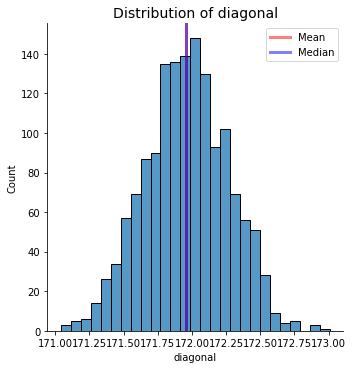

In [126]:
print("Mean =", df["diagonal"].mean())
print("Median =", df["diagonal"].median())
print("Mode =", df["diagonal"].mode())
print("Skewness =", df["diagonal"].skew())
print("Kurtosis =", df["diagonal"].kurtosis())
print("Variance =", df["diagonal"].var())
sns.displot(data=df, x="diagonal")
plt.axvline(x=df.diagonal.mean(), linewidth=3, color='r', label="mean", alpha=0.5)
plt.axvline(x=df.diagonal.median(), linewidth=3, color='b', label="median", alpha=0.5)
#plt.axvline(x=df.diagonal.mode(), linewidth=3, color='y', label="mode", alpha=0.5)

# set title, legends and labels
plt.xlabel("diagonal")
plt.ylabel("Count")
plt.title("Distribution of diagonal", size=14)
plt.legend(["Mean", "Median"])

#### <u>La variable diagonal:</u>

The distribution is normal.

This feature is continuous.

This feature is very concentrated around the mean, there are little variance.

Mean = 104.02953333333326
Median = 104.04
Mode = 0    103.95
Name: height_left, dtype: float64
Skewness = -0.09212062623418618
Kurtosis = -0.19527138384962806
Variance = 0.08967730042250421


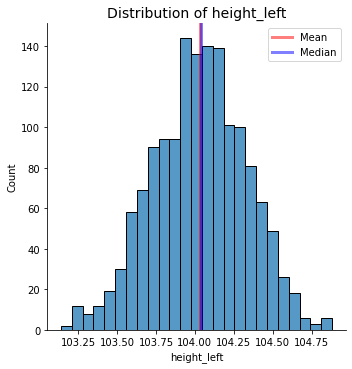

In [127]:
print("Mean =", df["height_left"].mean())
print("Median =", df["height_left"].median())
print("Mode =", df["height_left"].mode())
print("Skewness =", df["height_left"].skew())
print("Kurtosis =", df["height_left"].kurtosis())
print("Variance =", df["height_left"].var())
sns.displot(data=df, x="height_left")
plt.axvline(x=df.height_left.mean(), linewidth=3, color='r', label="mean", alpha=0.5)
plt.axvline(x=df.height_left.median(), linewidth=3, color='b', label="median", alpha=0.5)
#plt.axvline(x=df.diagonal.mode(), linewidth=3, color='y', label="mode", alpha=0.5)

# set title, legends and labels
plt.xlabel("height_left")
plt.ylabel("Count")
plt.title("Distribution of height_left", size=14)
plt.legend(["Mean", "Median"])

#### <u>La variable height_left:</u>

This feature is normally distributed.

This feature is continous.

This feature is concentrated around the mean, there are little variance.

Mean = 103.92030666666682
Median = 103.92
Mode = 0    103.76
Name: height_right, dtype: float64
Skewness = -0.00032754719443239615
Kurtosis = -0.027231670583065082
Variance = 0.10603299461863479


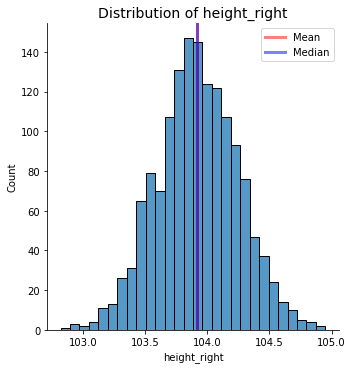

In [128]:
print("Mean =", df["height_right"].mean())
print("Median =", df["height_right"].median())
print("Mode =", df["height_right"].mode())
print("Skewness =", df["height_right"].skew())
print("Kurtosis =", df["height_right"].kurtosis())
print("Variance =", df["height_right"].var())
sns.displot(data=df, x="height_right")
plt.axvline(x=df.height_right.mean(), linewidth=3, color='r', label="mean", alpha=0.5)
plt.axvline(x=df.height_right.median(), linewidth=3, color='b', label="median", alpha=0.5)
#plt.axvline(x=df.diagonal.mode(), linewidth=3, color='y', label="mode", alpha=0.5)

# set title, legends and labels
plt.xlabel("height_right")
plt.ylabel("Count")
plt.title("Distribution of height_right", size=14)
plt.legend(["Mean", "Median"])

#### <u>La variable height_right:</u>

This feature is normally distributed.

This feature is continous.

This feature is concentrated around the mean, there are little variance.

Mean = 4.485967190704029
Median = 4.31
Mode = 0    4.08
1    4.10
2    4.18
Name: margin_low, dtype: float64
Skewness = 0.8630655172248257
Kurtosis = 0.22388560547646197
Variance = 0.440647200017205


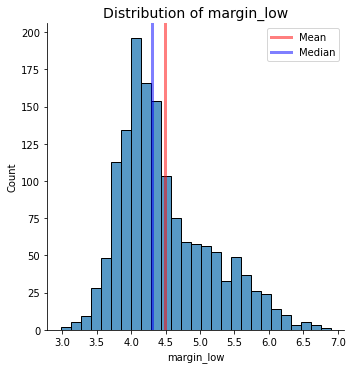

In [129]:
print("Mean =", df["margin_low"].mean())
print("Median =", df["margin_low"].median())
print("Mode =", df["margin_low"].mode())
print("Skewness =", df["margin_low"].skew())
print("Kurtosis =", df["margin_low"].kurtosis())
print("Variance =", df["margin_low"].var())
sns.displot(data=df, x="margin_low")
plt.axvline(x=df.margin_low.mean(), linewidth=3, color='r', label="mean", alpha=0.5)
plt.axvline(x=df.margin_low.median(), linewidth=3, color='b', label="median", alpha=0.5)
#plt.axvline(x=df.diagonal.mode(), linewidth=3, color='y', label="mode", alpha=0.5)

# set title, legends and labels
plt.xlabel("margin_low")
plt.ylabel("Count")
plt.title("Distribution of margin_low", size=14)
plt.legend(["Mean", "Median"])

#### <u>La variable margin_low:</u>

The distribution of this feature is right skewed.

This feature is continuous.

This feature is less concentrated around the mean, there more variance than for the other features.

Mean = 3.1514733333333305
Median = 3.14
Mode = 0    3.08
Name: margin_up, dtype: float64
Skewness = 0.14593782620878437
Kurtosis = -0.2450758065943628
Variance = 0.05373732083611294


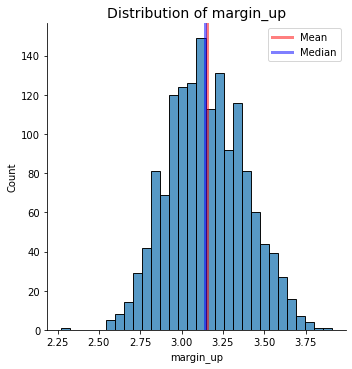

In [130]:
print("Mean =", df["margin_up"].mean())
print("Median =", df["margin_up"].median())
print("Mode =", df["margin_up"].mode())
print("Skewness =", df["margin_up"].skew())
print("Kurtosis =", df["margin_up"].kurtosis())
print("Variance =", df["margin_up"].var())
sns.displot(data=df, x="margin_up")
plt.axvline(x=df.margin_up.mean(), linewidth=3, color='r', label="mean", alpha=0.5)
plt.axvline(x=df.margin_up.median(), linewidth=3, color='b', label="median", alpha=0.5)
#plt.axvline(x=df.diagonal.mode(), linewidth=3, color='y', label="mode", alpha=0.5)

# set title, legends and labels
plt.xlabel("margin_up")
plt.ylabel("Count")
plt.title("Distribution of margin_up", size=14)
plt.legend(["Mean", "Median"])

#### <u>La variable margin_up:</u>

This feature is more normal than skewed but it is not normally distributed for all that.

This feature is continous.

This feature is concentrated around the mean, there little variance.

Mean = 112.6785000000001
Median = 112.96
Mode = 0    113.38
Name: length, dtype: float64
Skewness = -0.8159565381523239
Kurtosis = -0.280324604624993
Variance = 0.7616573215476992


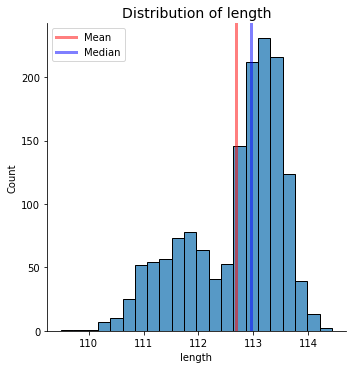

In [131]:
print("Mean =", df["length"].mean())
print("Median =", df["length"].median())
print("Mode =", df["length"].mode())
print("Skewness =", df["length"].skew())
print("Kurtosis =", df["length"].kurtosis())
print("Variance =", df["length"].var())
sns.displot(data=df, x="length")
plt.axvline(x=df.length.mean(), linewidth=3, color='r', label="mean", alpha=0.5)
plt.axvline(x=df.length.median(), linewidth=3, color='b', label="median", alpha=0.5)
#plt.axvline(x=df.diagonal.mode(), linewidth=3, color='y', label="mode", alpha=0.5)

# set title, legends and labels
plt.xlabel("length")
plt.ylabel("Count")
plt.title("Distribution of length", size=14)
plt.legend(["Mean", "Median"])

#### <u>La variable length:</u>

This feature is left skewed.

This feature is continous.

This feature is less concentrated around the mean, but there are more variance in comparaison to the other features.

True     1000
False     500
Name: is_genuine, dtype: int64


<AxesSubplot:xlabel='is_genuine', ylabel='count'>

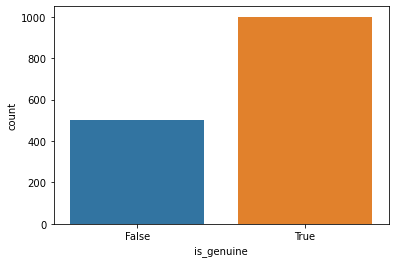

In [132]:
print(df["is_genuine"].value_counts())
sns.countplot(x="is_genuine", data=df)

The vast majority of the values are True.

In [133]:
dfvrai = df[df["is_genuine"] == True]

dfaux = df[df["is_genuine"] == False]

In [134]:
dfvrai.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1000.000000,1000.000000,1000.00000,971.000000,1000.00000,1000.000000
mean,171.987080,103.949130,103.80865,4.116097,3.05213,113.202430
std,0.300441,0.300231,0.29157,0.319124,0.18634,0.359552
min,171.040000,103.140000,102.82000,2.980000,2.27000,111.760000
25%,171.790000,103.740000,103.61000,3.905000,2.93000,112.950000
50%,171.990000,103.950000,103.81000,4.110000,3.05000,113.205000
75%,172.200000,104.140000,104.00000,4.340000,3.18000,113.460000
max,172.920000,104.860000,104.95000,5.040000,3.74000,114.440000


In [135]:
dfaux.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,500.000000,500.000000,500.000000,492.000000,500.000000,500.000000
mean,171.901160,104.190340,104.143620,5.215935,3.350160,111.630640
std,0.306861,0.223758,0.270878,0.553531,0.180498,0.615543
min,171.040000,103.510000,103.430000,3.820000,2.920000,109.490000
25%,171.690000,104.040000,103.950000,4.840000,3.220000,111.200000
50%,171.910000,104.180000,104.160000,5.190000,3.350000,111.630000
75%,172.092500,104.332500,104.320000,5.592500,3.472500,112.030000
max,173.010000,104.880000,104.950000,6.900000,3.910000,113.850000


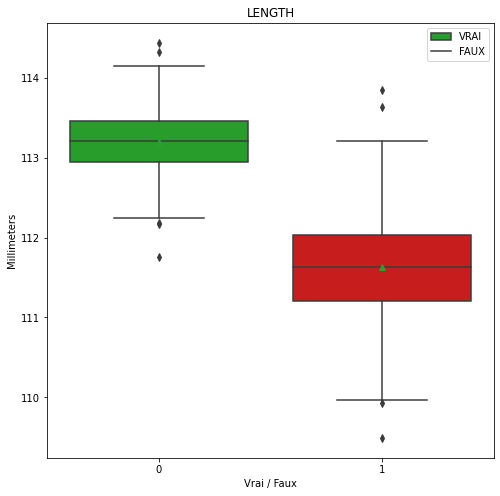

In [136]:
import seaborn as sns
plt.figure(figsize=(8,8))

sns.boxplot(
    data=[dfvrai["length"], dfaux["length"]],
    palette=[sns.xkcd_rgb["green"], sns.xkcd_rgb["red"]],
    showmeans=True
).set(title = "LENGTH", xlabel='Vrai / Faux', 
    ylabel='Millimeters')

plt.legend(labels=["VRAI","FAUX"])

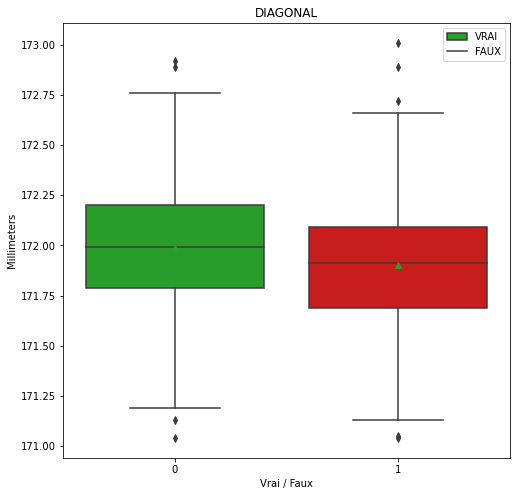

In [137]:
import seaborn as sns
plt.figure(figsize=(8,8))

sns.boxplot(
    data=[dfvrai["diagonal"], dfaux["diagonal"]],
    palette=[sns.xkcd_rgb["green"], sns.xkcd_rgb["red"]],
    showmeans=True
).set(title = "DIAGONAL", xlabel='Vrai / Faux', 
    ylabel='Millimeters')

plt.legend(labels=["VRAI","FAUX"])

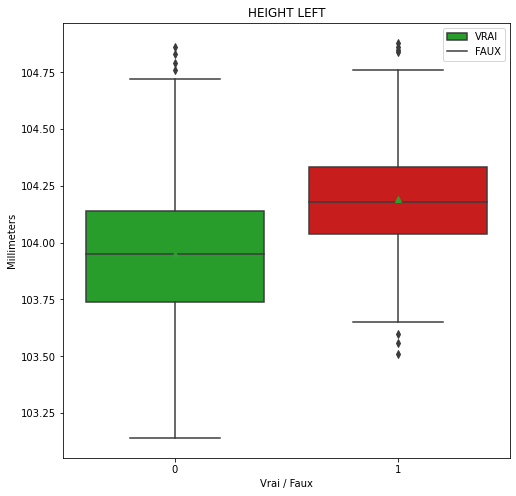

In [138]:
import seaborn as sns
plt.figure(figsize=(8,8))

sns.boxplot(
    data=[dfvrai["height_left"], dfaux["height_left"]],
    palette=[sns.xkcd_rgb["green"], sns.xkcd_rgb["red"]],
    showmeans=True
).set(title = "HEIGHT LEFT", xlabel='Vrai / Faux', 
    ylabel='Millimeters')

plt.legend(labels=["VRAI","FAUX"])

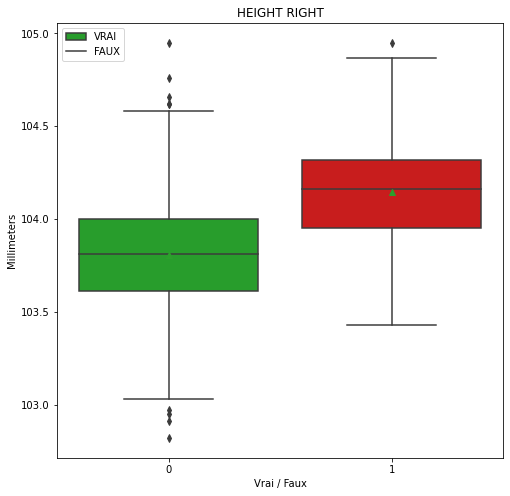

In [139]:
import seaborn as sns
plt.figure(figsize=(8,8))

sns.boxplot(
    data=[dfvrai["height_right"], dfaux["height_right"]],
    palette=[sns.xkcd_rgb["green"], sns.xkcd_rgb["red"]],
    showmeans=True
).set(title = "HEIGHT RIGHT", xlabel='Vrai / Faux', 
    ylabel='Millimeters')

plt.legend(labels=["VRAI","FAUX"])

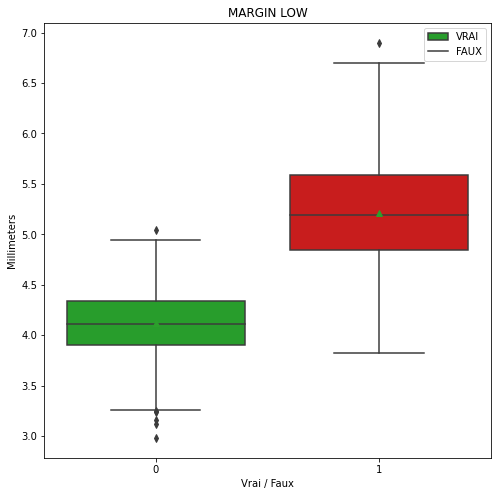

In [140]:
import seaborn as sns
plt.figure(figsize=(8,8))

sns.boxplot(
    data=[dfvrai["margin_low"], dfaux["margin_low"]],
    palette=[sns.xkcd_rgb["green"], sns.xkcd_rgb["red"]],
    showmeans=True
).set(title = "MARGIN LOW", xlabel='Vrai / Faux', 
    ylabel='Millimeters')

plt.legend(labels=["VRAI","FAUX"])

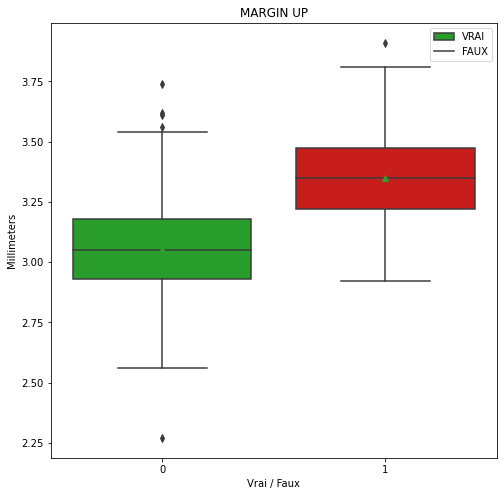

In [141]:
import seaborn as sns
plt.figure(figsize=(8,8))

sns.boxplot(
    data=[dfvrai["margin_up"], dfaux["margin_up"]],
    palette=[sns.xkcd_rgb["green"], sns.xkcd_rgb["red"]],
    showmeans=True
).set(title = "MARGIN UP", xlabel='Vrai / Faux', 
    ylabel='Millimeters')

plt.legend(labels=["VRAI","FAUX"])

***

### Correlations

In [142]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [143]:
dfcopy = df.copy()
dfcopy.drop(["is_genuine"], axis = 1, inplace = True)
df_corr = dfcopy.corr().round(2)

def HIGHLIGHT_COLOR(x):
    def colour_switch(number):
        if number >= 0.50 and number <= 0.90:
            color = "green"
        elif number <= -0.50 and number >= -0.90:
            color = "blue"
        elif number >= 0.90:
            color = "red"
        elif number <= -0.90:
            color = "red"

        else:
            # default
            color = "white"
            
        return color

    return [f'background-color: {colour_switch(number)}' for number in x]

df_corr.style.apply(HIGHLIGHT_COLOR)

#There are NaN because data does not varies.
#Correlation formula --> cor(i,j) = cov(i,j)/[stdev(i)*stdev(j)]

,diagonal,height_left,height_right,margin_low,margin_up,length
diagonal,1.000000,0.020000,-0.020000,-0.110000,-0.060000,0.100000
height_left,0.020000,1.000000,0.240000,0.300000,0.250000,-0.320000
height_right,-0.020000,0.240000,1.000000,0.390000,0.310000,-0.400000
margin_low,-0.110000,0.300000,0.390000,1.000000,0.430000,-0.670000
margin_up,-0.060000,0.250000,0.310000,0.430000,1.000000,-0.520000
length,0.100000,-0.320000,-0.400000,-0.670000,-0.520000,1.000000


<AxesSubplot:xlabel='margin_up', ylabel='length'>

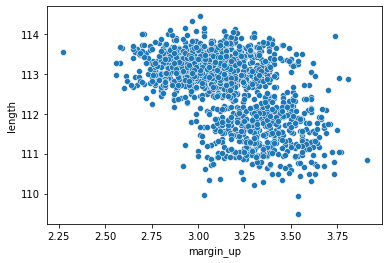

In [144]:
sns.scatterplot(data=df, x="margin_up", y="length")

<AxesSubplot:xlabel='margin_low', ylabel='length'>

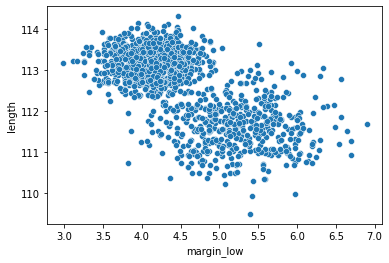

In [145]:
sns.scatterplot(data=df, x="margin_low", y="length")

We can see that the margins are anti correlated with length, if the length decrease, the margins also increase.

***

### Duplicated Rows

In [146]:
df.duplicated().sum()

0

***

### Outliers

In [147]:
#diagonal
s = df["diagonal"]
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])

print("diagonal")
print("Lower", iqr_lower)
print("Upper", iqr_upper)
print("Min", df['diagonal'].min())
print("Max", df['diagonal'].max())
print("\n")

diagonal
Lower 171.12
Upper 172.79999999999995
Min 171.04
Max 173.01




In [148]:
print(df[df["diagonal"] < 171.12])
print("\n")
print(df[df["diagonal"] > 172.79999999999995])

      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
729         True    171.04       103.84        103.64        4.22       3.36   
1388       False    171.05       104.09        104.50        4.72       3.10   
1142       False    171.04       104.23        104.22        4.87       3.56   

      length  
729   112.70  
1388  112.44  
1142  111.54  


      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
842         True    172.89       103.77        104.24        4.12       3.01   
1277       False    173.01       104.59        104.31        5.04       3.05   
828         True    172.92       103.55        103.94        4.78       3.27   
1022       False    172.89       104.03        104.03        6.03       3.00   

      length  
842   113.72  
1277  110.91  
828   113.55  
1022  110.95  


In [149]:
#height_left
s = df["height_left"]
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])

print("height_left")
print("Lower", iqr_lower)
print("Upper", iqr_upper)
print("Min", df['height_left'].min())
print("Max", df['height_left'].max())
print("\n")

height_left
Lower 103.20499999999998
Upper 104.84500000000003
Min 103.14
Max 104.88




In [150]:
print(df[df["height_left"] < 103.20499999999998])
print("\n")
print(df[df["height_left"] > 104.84500000000003])

     is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
292        True    172.09       103.14        103.81        4.88       3.01   
224        True    172.12       103.20        103.92        4.46       3.26   

     length  
292  113.69  
224  113.44  


      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1090       False    172.11       104.88        104.10        4.80       3.73   
0           True    171.81       104.86        104.95        4.52       2.89   
1382       False    171.97       104.85        104.52        5.87       3.56   
1150       False    171.79       104.86        104.34        5.39       3.14   

      length  
1090  110.78  
0     112.83  
1382  110.98  
1150  113.02  


In [151]:
#height_right
s = df["height_right"]
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])

print("height_right")
print("Lower", iqr_lower)
print("Upper", iqr_upper)
print("Min", df['height_right'].min())
print("Max", df['height_right'].max())
print("\n")

height_right
Lower 103.04999999999998
Upper 104.81000000000003
Min 102.82
Max 104.95




In [152]:
print(df[df["height_right"] < 103.04999999999998])
print("\n")
print(df[df["height_right"] > 104.81000000000003])

     is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
761        True    172.16       103.93        103.04        4.14       2.99   
176        True    171.75       103.63        102.97        4.46       2.77   
193        True    172.35       103.73        102.95        4.49       3.37   
77         True    171.84       104.09        103.03        4.11       2.77   
251        True    171.80       103.26        102.82         NaN       2.95   
522        True    172.02       104.42        102.91        3.86       3.12   

     length  
761  113.26  
176  113.22  
193  112.49  
77   113.18  
251  113.22  
522  113.43  


      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1321       False    172.29       104.72        104.86        5.71       3.16   
0           True    171.81       104.86        104.95        4.52       2.89   
1331       False    172.32       104.60        104.83        4.84       3.51   
1199       False    172.03

In [153]:
#margin_low
s = df["margin_low"]
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])

print("margin_low")
print("Lower", iqr_lower)
print("Upper", iqr_upper)
print("Min", df['margin_low'].min())
print("Max", df['margin_low'].max())
print("\n")

margin_low
Lower 2.732499999999999
Upper 6.152500000000001
Min 2.98
Max 6.9




In [154]:
df[df["margin_low"] > 6.152500000000001]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1473,False,171.76,104.04,104.12,6.29,3.20,112.87
1133,False,171.79,103.99,103.67,6.16,3.52,110.93
1134,False,171.91,103.70,104.41,6.34,3.50,113.05
1426,False,172.22,103.92,104.03,6.25,3.14,110.89
1254,False,171.15,104.09,104.30,6.49,3.20,111.61
1075,False,172.02,104.51,103.69,6.23,3.39,112.35
1348,False,171.84,104.32,104.50,6.28,3.00,111.06
1290,False,171.94,104.06,104.22,6.90,3.36,111.70
1345,False,171.56,104.17,103.87,6.16,3.38,111.55
1459,False,171.78,104.31,103.82,6.19,3.25,111.14


In [155]:
#margin_up
s = df["margin_up"]
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])

print("margin_up")
print("Lower", iqr_lower)
print("Upper", iqr_upper)
print("Min", df['margin_up'].min())
print("Max", df['margin_up'].max())
print("\n")

margin_up
Lower 2.5100000000000007
Upper 3.79
Min 2.27
Max 3.91




In [156]:
print(df[df["margin_up"] < 2.5100000000000007])
print("\n")
print(df[df["margin_up"] > 3.79])

     is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
664        True    172.05        103.7        103.75        5.04       2.27   

     length  
664  113.55  


      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1029       False    171.96       104.29        104.03        6.01       3.91   
1270       False    171.26       104.22        104.07        4.78       3.81   

      length  
1029  110.83  
1270  112.88  


In [157]:
#length
s = df["length"]
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])

print("length")
print("Lower", iqr_lower)
print("Upper", iqr_upper)
print("Min", df['length'].min())
print("Max", df['length'].max())
print("\n")

length
Lower 110.065
Upper 115.305
Min 109.49
Max 114.44




In [158]:
df[df["length"] < 110.065]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1082,False,171.75,103.96,103.83,5.39,3.54,109.49
1453,False,171.55,104.20,104.49,5.42,3.54,109.93
1355,False,171.68,103.89,103.70,5.97,3.03,109.97


In this dataset there are no outliers, there are some values that are a little bit out the upper and lower range in the True and False values but because all the bills are not always the same size, and that we don't know what are the values of the bills there are no shocking values.

Bills are in euros money.
For exemple in euros a bills of 20 is smaller than a 500 bills.

***

### Filling Missing Values with Linear Regression

In [159]:
#1. Separate the null values

#This df_test contains only the null values from the margin_low columns.

df_test = df[df["margin_low"].isnull()]
df_test.head(5)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
780,True,172.41,103.95,103.79,NaN,3.13,113.41
284,True,171.92,103.83,103.76,NaN,3.23,113.29
895,True,171.81,103.68,103.80,NaN,2.98,113.82
151,True,172.07,103.80,104.38,NaN,3.02,112.93
710,True,172.03,103.97,103.86,NaN,3.07,112.65


In [160]:
#2. Drop the null values from the df and consider it as df_train.

df.dropna(inplace = True)
df.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [161]:
#3. Create x_train and y_train from df. 

#y_train is rows from df["margin_low"] with no null values.
y_train = df["margin_low"]
print(y_train.shape)
print(y_train)

print("\n")

#x_train is the dataset except df["margin_low"] with no null values.
x_train = df.drop("margin_low", axis = 1)
print(x_train.shape)
print(x_train)

(1463,)
1103    4.41
323     4.05
207     3.98
71      4.09
927     3.95
        ... 
1308    5.62
1467    4.95
507     4.15
5       4.42
951     4.51
Name: margin_low, Length: 1463, dtype: float64


(1463, 6)
      is_genuine  diagonal  height_left  height_right  margin_up  length
1103       False    171.88       104.05        103.75       3.21  112.52
323         True    171.91       103.83        103.68       2.86  113.41
207         True    172.30       104.34        103.93       3.33  113.08
71          True    171.84       103.59        103.98       3.05  113.09
927         True    172.18       104.65        103.81       3.07  113.03
...          ...       ...          ...           ...        ...     ...
1308       False    172.36       104.02        104.32       3.40  112.13
1467       False    171.16       103.80        103.93       3.36  112.29
507         True    171.97       104.05        104.11       2.99  113.66
5           True    172.17       103.74        104.08       

In [162]:
#4. Build the model.

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#Train the model on train dataset (x_train, y_train)

lr.fit(x_train, y_train)

LinearRegression()

In [163]:
#5. Create the x_test from the test data.

x_test = df_test.drop("margin_low", axis = 1)
print(x_test.shape)
print(x_test)

(37, 6)
      is_genuine  diagonal  height_left  height_right  margin_up  length
780         True    172.41       103.95        103.79       3.13  113.41
284         True    171.92       103.83        103.76       3.23  113.29
895         True    171.81       103.68        103.80       2.98  113.82
151         True    172.07       103.80        104.38       3.02  112.93
710         True    172.03       103.97        103.86       3.07  112.65
611         True    171.80       103.68        103.49       3.30  112.84
413         True    172.30       103.66        103.50       3.16  112.95
1121       False    171.40       104.38        104.19       3.17  112.39
871         True    171.37       104.07        103.75       3.07  113.27
1435       False    172.66       104.33        104.41       3.56  111.47
1076       False    171.57       104.27        104.44       3.21  111.87
445         True    172.34       104.42        103.22       3.01  112.97
410         True    172.56       103.72    

In [164]:
#6. Apply the model on x_test and predict the missing values.

y_pred = lr.predict(x_test)
y_pred
print(y_pred.shape)

(37,)


In [165]:
y_pred

array([4.09276238, 4.07412432, 4.12353555, 4.13400328, 4.11586845,
       4.05106842, 4.07363322, 5.264817  , 4.12193808, 5.17345045,
       5.25968515, 4.11897255, 4.0807278 , 4.18037978, 5.30206887,
       4.11250192, 4.22555104, 4.11199026, 4.15717623, 4.06495361,
       4.16028787, 5.1754678 , 4.13384101, 4.09696025, 5.24675055,
       5.28251853, 4.10962313, 4.10284101, 4.19842271, 4.1403993 ,
       4.08184346, 3.99357074, 4.09428392, 5.20035843, 4.13648423,
       4.17837685, 4.12538999])

In [166]:
#7. Replace the missing values with the predicted values.

df_test.loc[df_test.margin_low.isnull(), "margin_low"] = y_pred

df = df_test.append(df, ignore_index=False)

print(df.shape)

(1500, 7)


In [167]:
df.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [168]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.482844,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.659899,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.027500,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


When we look to the values which was not missing and we compare the results of the linear regression, we can see that the results are coherent.

We have values between 2.98 and 6.98 when we look at the stats descriptions in the Out 17 before we did the linear regression. And after the linear regression the y_pred gives us values between 4 and 5. And also the stats descriptions post linear regression show values between 2.98 and 6.98.

Mean = 4.482844418751937
Median = 4.31
Mode = 0    4.08
1    4.10
2    4.18
Name: margin_low, dtype: float64
Skewness = 0.8754684001564659
Kurtosis = 0.24718290989648795
Variance = 0.4354671723677865


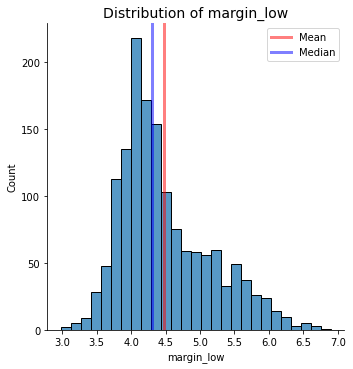

In [169]:
print("Mean =", df["margin_low"].mean())
print("Median =", df["margin_low"].median())
print("Mode =", df["margin_low"].mode())
print("Skewness =", df["margin_low"].skew())
print("Kurtosis =", df["margin_low"].kurtosis())
print("Variance =", df["margin_low"].var())
sns.displot(data=df, x="margin_low")
plt.axvline(x=df.margin_low.mean(), linewidth=3, color='r', label="mean", alpha=0.5)
plt.axvline(x=df.margin_low.median(), linewidth=3, color='b', label="median", alpha=0.5)
#plt.axvline(x=df.diagonal.mode(), linewidth=3, color='y', label="mode", alpha=0.5)

# set title, legends and labels
plt.xlabel("margin_low")
plt.ylabel("Count")
plt.title("Distribution of margin_low", size=14)
plt.legend(["Mean", "Median"])

La distribution de la variable margin_low n'a pas beaucoup changée suit à l'imputation des valeurs manquantes.

Sa distribution est assymetric (positive / droite).

Cette variable est de type quantitatif continue.

Elle est moins concentrée autour de la moyenne, il y a plus de variance que par rapport aux variables de taille.

***

### Feature Scaling

All my data are in the same scale (milimeters), so I don't need to scale them.

***

### Label Encoding

In [170]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
df["is_genuine"] = lb.fit_transform(df["is_genuine"])
df["is_genuine"]

780     1
284     1
895     1
151     1
710     1
       ..
1308    0
1467    0
507     1
5       1
951     1
Name: is_genuine, Length: 1500, dtype: int32

***

### Train Test Split

In [171]:
from sklearn.model_selection import train_test_split

y = df["is_genuine"]
x = df.drop(["is_genuine"], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

***

### Linear Regression Importation

In [172]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()

***

### GridSerachCV

In [173]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty':["l1", "l2", "elasticnet", "none"], 
              'C':np.logspace(-4, 4, 20),
              'solver':["lbfgs", "newton-cg", "liblinear", "sag", "saga"]}]
#1000, 2500, 5000
grid = GridSearchCV(logr, param_grid = parameters, cv = 5)

In [174]:
best_params = grid.fit(x_train, y_train)

In [175]:
grid.best_score_

0.9914285714285714

In [176]:
best_params.best_estimator_

LogisticRegression(C=1.623776739188721)

***

### Parameters Tuning for Logistic Regression

In [177]:
logr_grid = best_params.best_estimator_

***

### Evaluation of the Logistic Regression

In [178]:
logr_grid.score(x_test, y_test)

0.9911111111111112

In [179]:
predictions = logr_grid.predict(x_test)
predictions = pd.DataFrame(data = predictions)
predictions.head(5)

,0
0,1
1,1
2,1
3,1
4,1


In [180]:
probabilities = logr_grid.predict_proba(x_test)
probabilities = pd.DataFrame(data = probabilities)
probabilities.head(3)

,0,1
0,0.004540,0.995460
1,0.020057,0.979943
2,0.000113,0.999887


In [181]:
comparaisons = pd.merge(predictions, probabilities, left_index=True, right_index=True)
comparaisons.rename(columns = {'0_x':'predicitons', '0_y':'0'}, inplace = True)
comparaisons.round(3)

,predicitons,0,1
0,1,0.005,0.995
1,1,0.020,0.980
2,1,0.000,1.000
3,1,0.089,0.911
4,1,0.038,0.962
...,...,...,...
445,1,0.022,0.978
446,1,0.000,1.000
447,0,1.000,0.000
448,1,0.129,0.871


In [182]:
y_test_answers = pd.DataFrame(data = y_test)
y_test_answers = y_test_answers.reset_index()
y_test_answers.drop(["index"], axis = 1, inplace = True)
y_test_answers.head(5)

,is_genuine
0,1
1,1
2,1
3,1
4,1


In [183]:
comparaisons = pd.merge(comparaisons, y_test_answers, left_index=True, right_index=True)
comparaisons.round(3)

,predicitons,0,1,is_genuine
0,1,0.005,0.995,1
1,1,0.020,0.980,1
2,1,0.000,1.000,1
3,1,0.089,0.911,1
4,1,0.038,0.962,1
...,...,...,...,...
445,1,0.022,0.978,1
446,1,0.000,1.000,1
447,0,1.000,0.000,0
448,1,0.129,0.871,1


In [184]:
conditions = [
            (comparaisons['predicitons'] == 1) & (comparaisons['is_genuine'] == 1),
            (comparaisons['predicitons'] == 0) & (comparaisons['is_genuine'] == 0),
            (comparaisons['predicitons'] == 0) & (comparaisons['is_genuine'] == 1),
            (comparaisons['predicitons'] == 1) & (comparaisons['is_genuine'] == 0)
]


choices = ['TP', 'TN', 'FN', "FP"]

comparaisons['CM'] = np.select(conditions, choices)

print(comparaisons[comparaisons["CM"] == "FP"])
print("\n")
print(comparaisons[comparaisons["CM"] == "FN"])

     predicitons         0         1  is_genuine  CM
123            1  0.191087  0.808913           0  FP


     predicitons         0         1  is_genuine  CM
211            0  0.857986  0.142014           1  FN
260            0  0.656370  0.343630           1  FN
379            0  0.598244  0.401756           1  FN


In [72]:
# 1 représentent les vrai.
# 0 représentent les faux.

In [185]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[150,   1],
       [  3, 296]], dtype=int64)

In [186]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
(tn, fp, fn, tp)

(150, 1, 3, 296)

In [187]:
print("The errors ratio is", 3/450)

The errors ratio is 0.006666666666666667


AUC: 0.9916720193138275


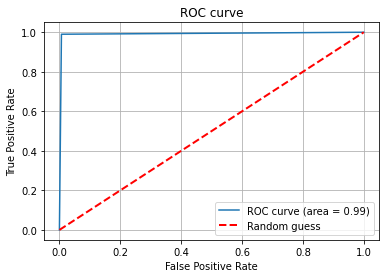

In [188]:
from sklearn import metrics
fpr, tpr, thresh = metrics.roc_curve(y_test,  predictions)
auc = metrics.auc(fpr, tpr)
print("AUC:", auc)

plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

***

### Save The Model

In [189]:
filename = 'lrmodel.sav'
joblib.dump(logr_grid, filename)

['lrmodel.sav']

***

***

### PCA

In [190]:
dfcopy = df.copy()
dfcopy.set_index("is_genuine", inplace = True)
dfcopy.rename(index={0:'Faux'},inplace=True)
dfcopy.rename(index={1:'Vrai'},inplace=True)

#dfcopy.drop(["is_genuine"], axis = 1, inplace = True)

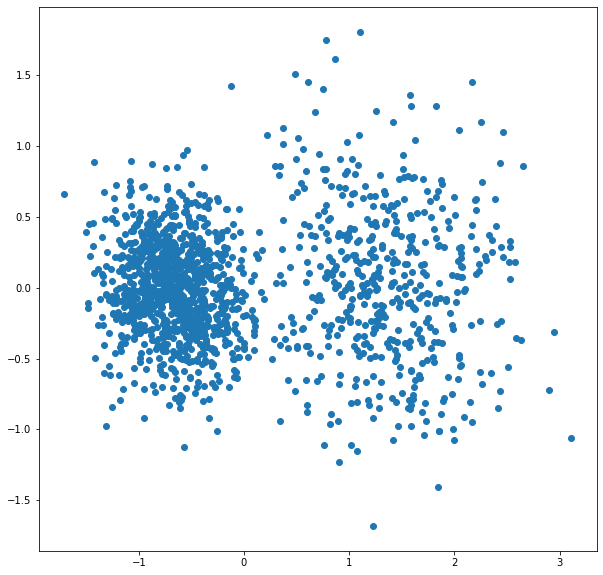

In [191]:
from sklearn.decomposition import PCA

pcamodel = PCA(n_components = 2)
df_pca = pcamodel.fit_transform(dfcopy)

plt.figure(figsize=(10,10))
plt.scatter(df_pca[:,0], df_pca[:,1])

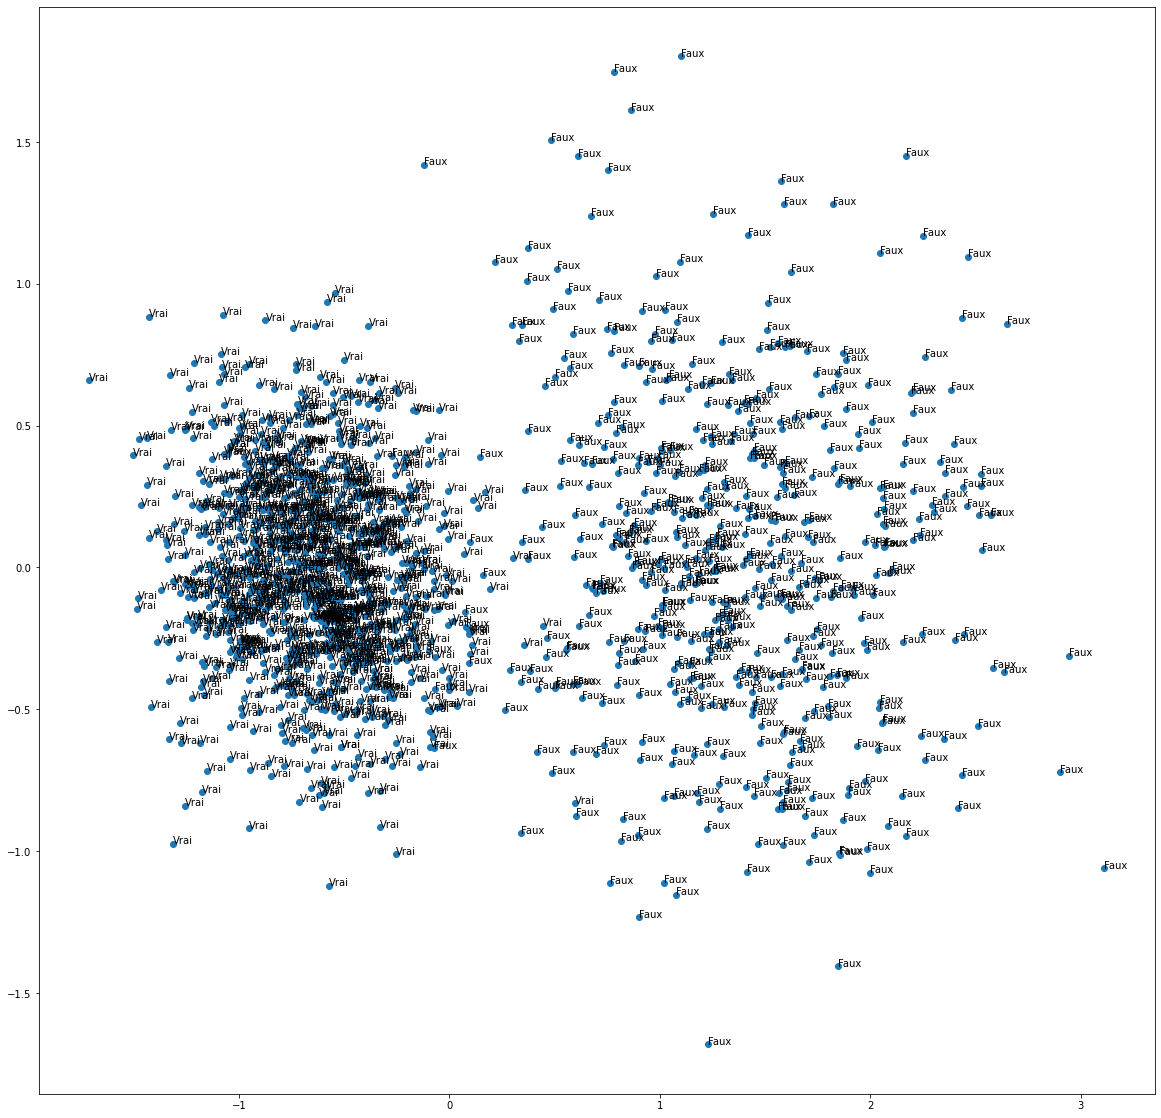

In [192]:
col = ["PC1", "PC2"]
df_pca = pd.DataFrame(data = df_pca, columns=col, index = dfcopy.index)

import matplotlib.pyplot as plt
  
x = df_pca.iloc[:,0]
y = df_pca.iloc[:,1]
text = df_pca.index

plt.figure(figsize=(20,20))

plt.scatter(x, y)

for i in range(len(x)):
    plt.annotate(text[i], (x[i], y[i]))
  
plt.show()

### K-Means

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[1 1 1 ... 1 1 1]


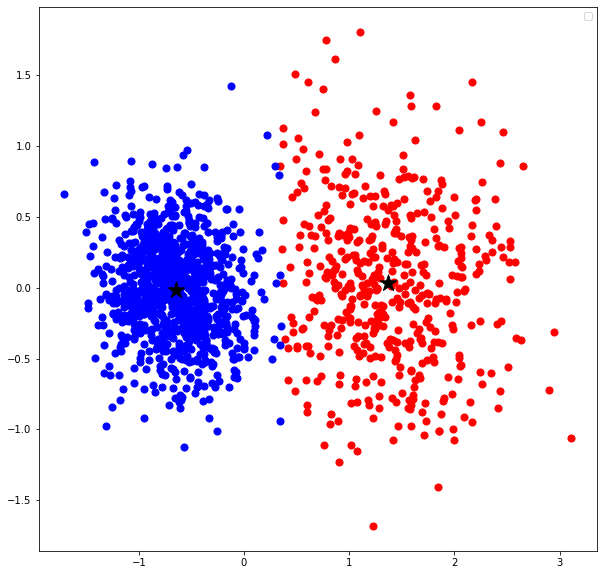

In [193]:
from sklearn.cluster import KMeans

kmeansmodel = KMeans(n_clusters = 2)
centroid = kmeansmodel.fit_predict(df_pca.values)
df_pca['Cluster'] = centroid
print(centroid)

plt.figure(figsize=(10,10))
plt.scatter(x = df_pca.values[centroid == 0,0], y = df_pca.values[centroid == 0,1], s = 50, c = "red")
plt.scatter(x = df_pca.values[centroid == 1,0], y = df_pca.values[centroid == 1,1], s = 50, c = "blue")
plt.legend()
plt.scatter(kmeansmodel.cluster_centers_[:,0], kmeansmodel.cluster_centers_[:,1], s = 300, c = "black", marker = "*", label = "Centroids")

plt.show()

### Evaluation of the K-Means

In [194]:
centroid

array([1, 1, 1, ..., 1, 1, 1])

In [195]:
kmeansmodel.cluster_centers_

array([[ 1.37201771,  0.02982503],
       [-0.64961939, -0.01412148]])

In [196]:
pd.crosstab(df["is_genuine"], kmeansmodel.labels_)

col_0,0,1
is_genuine,,
0,480,20
1,2,998


In [197]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df.is_genuine, kmeansmodel.labels_)

array([[480,  20],
       [  2, 998]], dtype=int64)

In [198]:
tn, fp, fn, tp = confusion_matrix(df.is_genuine, kmeansmodel.labels_).ravel()
(tn, fp, fn, tp)

(480, 20, 2, 998)

In [199]:
from sklearn.metrics import silhouette_score

kmeansmodel.fit_predict(dfcopy)

score = silhouette_score(dfcopy, kmeansmodel.labels_, metric="euclidean")

print('Silhouetter Score: %.2f' % score)

Silhouetter Score: 0.52


***

### Save The Model

In [200]:
filename = 'kmmodel.sav'
joblib.dump(kmeansmodel, filename)

['kmmodel.sav']